In [ ]:
'''Librerías'''
import numpy as np
import matplotlib.pyplot as plt
import pickle # Los modelos antiguos de ML no tienen método save y usan la librearia pickle para poder salvarse y cargarse.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
import random
import pandas as pd
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/SOMDrive/bacteriaID/

/content/drive/MyDrive/SOMDrive/bacteriaID


In [ ]:
'''Datos: Cambiar el acceso a los datos'''
X_fn = './data/X_reference.npy'
y_fn = './data/y_reference.npy'
X = np.load(X_fn)
y = np.load(y_fn)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pca = PCA(n_components=90)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

In [ ]:
clf = SVC()
clf.fit(X_t_train, y_train)
print (clf.score(X_t_test, y_test))

In [ ]:
filename = 'SVC_model_saved_11_05_2021.sav'
#Este código sólo para salvar el modelo
#pickle.dump(clf, open(filename, 'wb'))

In [ ]:
# cargamos el modelo previamente entrenado.
clf2 = pickle.load(open(filename, 'rb'))

In [ ]:
ypred = clf2.predict(X_t_test)
f1_score(y_test, ypred, average='micro')

0.9317222222222222

In [ ]:
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       595
         1.0       1.00      1.00      1.00       596
         2.0       0.80      0.80      0.80       594
         3.0       0.86      0.79      0.82       592
         4.0       0.89      0.91      0.90       616
         5.0       0.99      0.99      0.99       608
         6.0       0.85      0.81      0.83       557
         7.0       0.83      0.87      0.85       610
         8.0       0.79      0.77      0.78       602
         9.0       0.94      0.95      0.95       598
        10.0       0.94      0.93      0.93       541
        11.0       0.91      0.96      0.93       621
        12.0       0.99      0.97      0.98       584
        13.0       0.98      0.99      0.98       622
        14.0       0.98      0.98      0.98       614
        15.0       0.91      0.94      0.93       594
        16.0       0.94      0.92      0.93       630
        17.0       0.96    

In [ ]:
cm = confusion_matrix(y_test, ypred)
print(cm)

[[595   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 596   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 473  17   7   1   0   0  61   4   2  15   0   0   0   0   0   0
    0   0   0   0  14   0   0   0   0   0   0   0]
 [  0   0  28 467  38   0   0   0  19  18   1   6   0   0   0   0   0   0
    0   3   0   0  11   0   0   0   0   0   0   1]
 [  0   0   2  23 559   0   0   0   3   9   2   1   0   0   0   0   0   1
    0   1   0   0  14   0   0   0   0   0   0   1]
 [  0   0   0   0   0 599   9   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2 453  88   0   0   0   0   0   0   2   0   0   2
    0   0   0   0   0   0   0  10   0   0   0   0]
 [  0   0   0   0   0   0  68 532   1   0   0   0   0   0   0   0   0   3
    0   1   0   0   0   0   0   5   0   0   0   0]


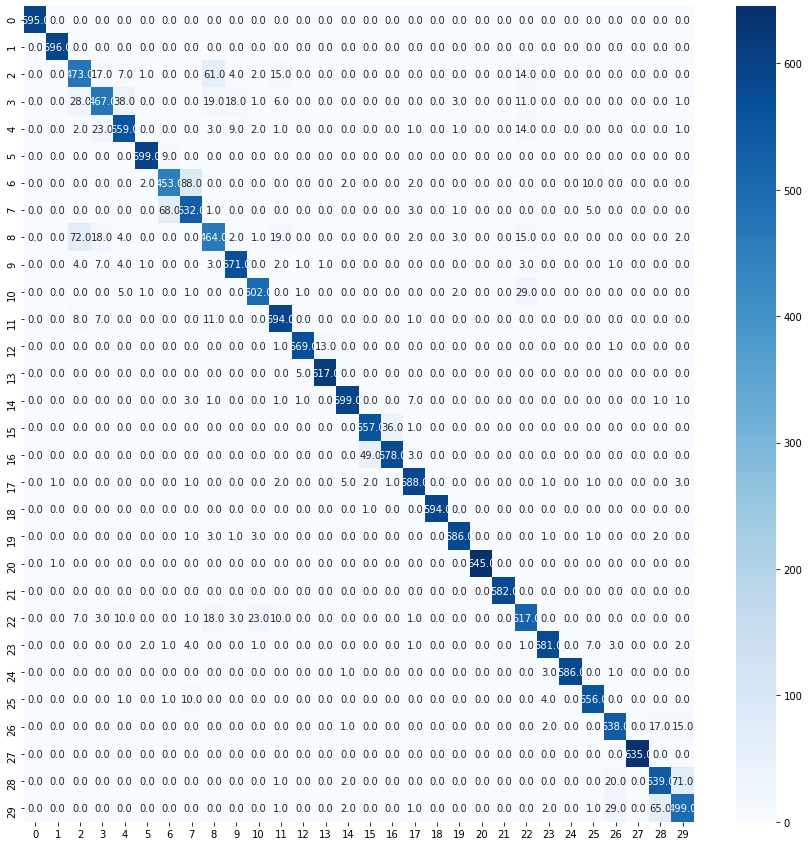

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt2
cf_matrix = confusion_matrix(y_test, ypred)
plt2.figure(figsize=(15,15))
sns.heatmap(cf_matrix, annot=True,fmt=".1f",cmap='Blues' )
plt2.show()

## Añadimos ruido aleatorio a un intervalo dentro de cada muestra.

Los parámetros de entrada serían:
- X_n = los datos de muestra a los que se aplica el intervalo de ruido
- range_inter = el tamaño del intervalo.
- alpha = permite la variación de la amplitud del ruido

El intervalo empezará en una posición aleatoria y diferente para cada muestra.

Se calcula la diferencia entre el máximo y 1 y se genera un ruido aleatorio centrado en 0 y desviación típica esa diferencia multiplicada por una variable alpha.


In [ ]:
def add_noise (X_n, range_inter,alpha):
       
    for i in range(X_n.shape[0]):
        x_start= random.randint(0, 1000-range_inter)      # punto inicial desde donde vamos a incluir el ruido, cambia para cada muestra
        x_end= x_start + range_inter                      # punto final del ruido.
                
        diff= 1 - max(X_n[i][x_start: x_end].clip(0, 1))  # calculamos la diferencia entre uno y el valor máximo de la muestra en el intervalo
        if (diff == 0): diff = 0.001                      # si el valor máximo en el intervalo es igual a 1, hacemos al menos hay una pequeña diferencia  
                                                          # para incluir ruido y que las muestras no sean iguales.
        
        # calculamos ruido 
        noise = np.random.normal(0, diff*alpha,range_inter)
        X_n[i][x_start: x_end] += noise
    
    return X_n

### Ejemplo de visualización de datos con ruido.

In [ ]:
range_inter = 150                 # longitud del intervalo. 
alpha = 0.25                      # Porcentaje sobre la diferencia del maximo a 1

In [ ]:
X_noise= X_test.copy()
v_plot = np.random.randint(0, X_noise.shape[0], 3)
X_noise = add_noise (X_noise[v_plot], range_inter,alpha)

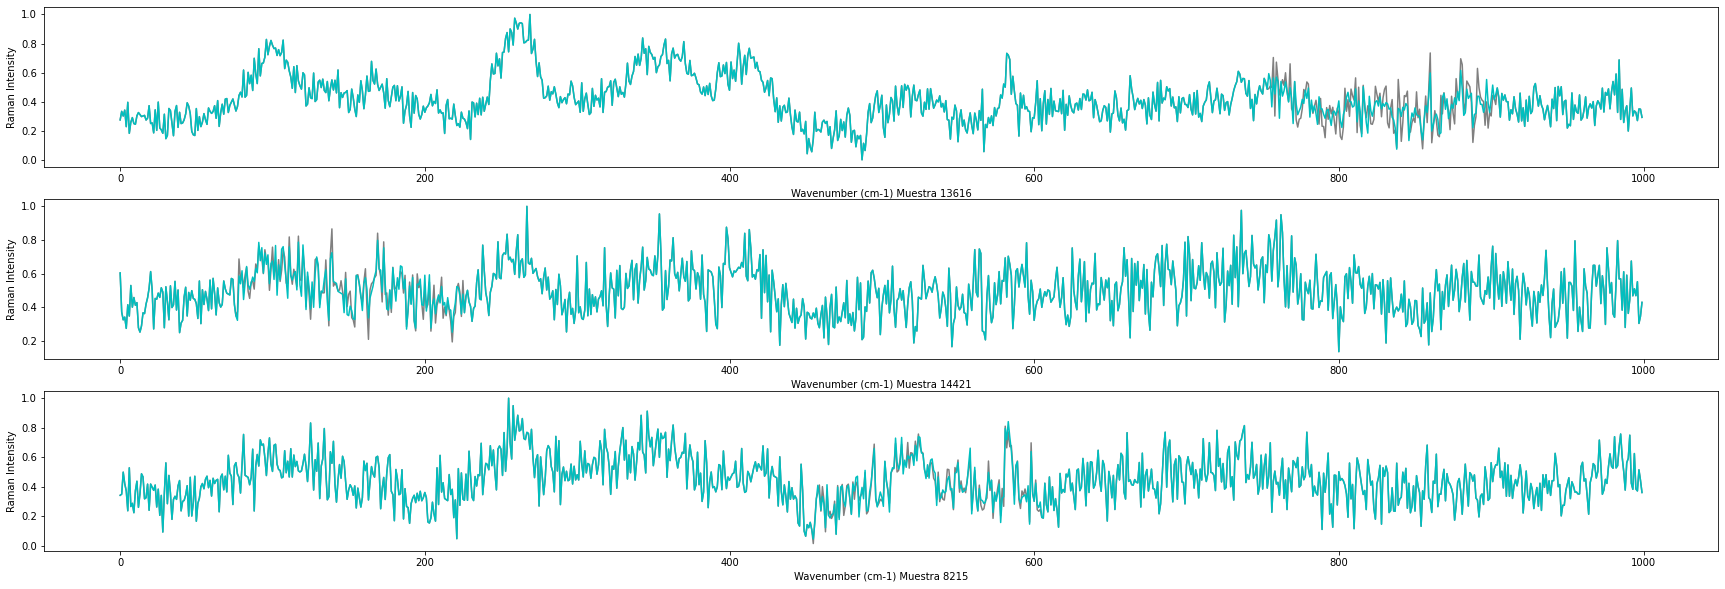

In [ ]:
# Mostramos algunos ejemplos de cómo quedarían las muestras tras añadir el ruido
figure =plt.gcf()
figure.set_size_inches(30,10)

plt.subplot(311)
label = 'Wavenumber (cm-1) Muestra ' + str(v_plot[0])
plt.xlabel(label)
plt.ylabel('Raman Intensity')
plt.plot(X_noise[0], color='grey')
plt.plot(X_test[v_plot[0]], color='c')

plt.subplot(312)
label = 'Wavenumber (cm-1) Muestra ' + str(v_plot[1])
plt.xlabel(label)
plt.ylabel('Raman Intensity')
plt.plot(X_noise[1], color='grey')
plt.plot(X_test[v_plot[1]], color='c')

plt.subplot(313)
label = 'Wavenumber (cm-1) Muestra ' + str(v_plot[2])
plt.xlabel(label)
plt.ylabel('Raman Intensity')
plt.plot(X_noise[2], color='grey')
plt.plot(X_test[v_plot[2]], color='c')

plt.show() 

### Predecimos con los datos con ruido

Generarmos distintos escenarios variando el intervalo de ruido y la amplitud del mismo para ver el comportamiento 

In [ ]:
range_inter = [0, 50, 100, 150]                             # longitud del intervalo. 
alpha_list = [0.1, 0.25, 0.40, 0.55, 0.70, 0.85, 1.0]       # Porcentaje sobre la diferencia del maximo a 1
df = pd.DataFrame(np.zeros((len(alpha_list), len(range_inter))),
                  index=alpha_list,
                  columns=range_inter)

In [ ]:
# Inicializamos la primera columna al valor de f1 para los datos de test del estudio.
df.loc[:][0]=f1_score(y_test, ypred, average='micro')

In [ ]:
df

,0,50,100,150
0.10,0.931722,0.0,0.0,0.0
0.25,0.931722,0.0,0.0,0.0
0.40,0.931722,0.0,0.0,0.0
0.55,0.931722,0.0,0.0,0.0
0.70,0.931722,0.0,0.0,0.0
0.85,0.931722,0.0,0.0,0.0
1.00,0.931722,0.0,0.0,0.0


In [ ]:
# Calculamos la medida de f1 para distintos valores de rango de intervalo y de alpha para ver el comportamiento.
for range_i in range_inter[1:]:
  for alpha in alpha_list:
    X_noise= X_test.copy()                                                  # reiniciamos los datos con los originales de test del estudio
    X_noise = add_noise (X_noise, range_i, alpha)                           # aplicamos ruido
    file_name= './data/X_noise_'+ str(range_i)+'_'+ str(alpha) +'.npy'      # nombre del fichero para guardar los datos.
    np.save ( file_name ,X_noise)                                           # guardamos los datos por si queremos recuperarlos como nuevos datos
    X_t_test_noise = pca.transform(X_noise)                                 # aplicamos PCA
    ypred_noise = clf2.predict(X_t_test_noise)                              # hacemos la prediccion sobre los datos
    df.loc[alpha][range_i] = f1_score(y_test, ypred_noise, average='micro') # guardamos los resultados
    


In [ ]:
df

,0,50,100,150
0.10,0.931722,0.931389,0.931333,0.932000
0.25,0.931722,0.930667,0.930500,0.929944
0.40,0.931722,0.927778,0.926500,0.928778
0.55,0.931722,0.927222,0.923944,0.925222
0.70,0.931722,0.921722,0.921889,0.920722
0.85,0.931722,0.919500,0.915167,0.911278
1.00,0.931722,0.913778,0.904722,0.896667


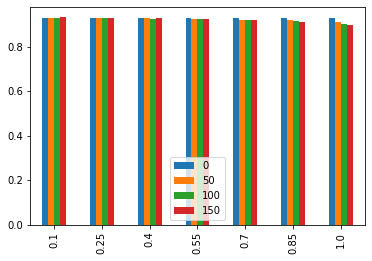

In [ ]:
# para cada valor de alpha, mostramos el resultado de f1 al variar el ancho del intervalo.
df.plot.bar();

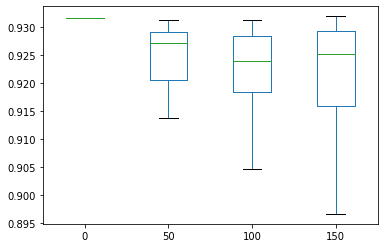

In [ ]:
# para cada ancho de intervalo, mostramos la variabilidad de f1
df.plot.box()

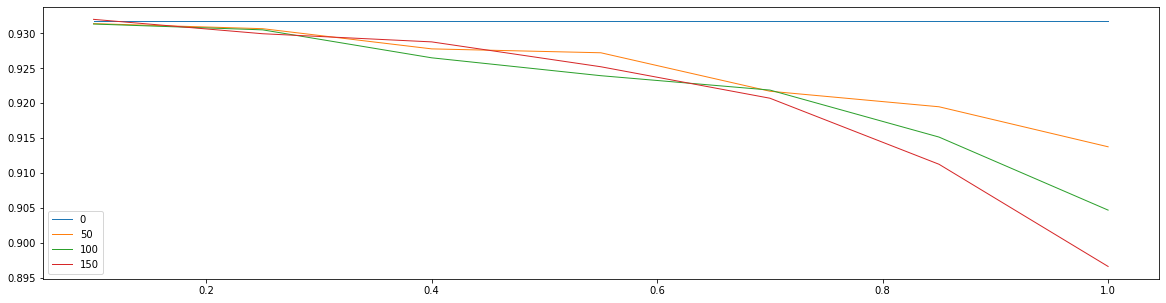

In [ ]:
# valores de f1 para cada valor de alpha y cada ancho de intervalo
df.plot.line(figsize=(20,5),lw=1);

### Análisis de resultados

Partiendo de los datos de test hemos aplicado intervalos de ruido.  
Se han hecho pruebas con intervalos de longitud 50, 100 y 150 características a modificar.  
Se observa que al aumentar el ancho del intervalo donde se aplica el ruido disminuye el valor de f1. También al aumentar el valor de alpha, creciendo la intensidad del ruido, disminuye el valor de f1.

 - para todos los distintos anchos de intervalos, cuando el valor de alpha es bajo, 0.25, la precisión con lo datos de ruido no se ve afectada. La máxima disminución sería (0.931722 - 0.929944) = 0.001778 para el intervalo de 150 características con 0.25% de ruido.

 - para intervalos de 50 características con ruido la precisión se mantiene cercana a la inicial sin ruido. Siendo la máxima disminución cuando el valor de alpha es 1: (0.931722 - 0.913778) = 0.017944. Pero para valores intermedios de alpha como 0.70 la disminución sería de (0.931722 - 0.921722) = 0,01, con lo que el cambio en 50 características no se ve muy afectado por un ruido medio.

 - para intervalos de 100 características con ruido se observa como la diferencia con intervalos de 50 características no es grande para valores medios de alpha, aunque para valores mayores sí se muestra mayor diferencia. Para un valor medio de alpha, 0.70, la disminución sería 0.009833, se diferencia sólo en 0.000167 ofrecido para los intervalos de 50 características. Para mayores valores de alpha, como se puede ver en la gráfica, la precisión baja de forma más pronunciada, siendo la máxima disminución con alpha = 1, la disminución es 0.027, 1,5 veces mayor que para intervalos de 50 características.

 - para intervalos de 150 características con ruido, para valores medios de alpha, 0.70, la diferencia es 0.011, 1,1 veces mayor que con intervalos de 50 características con ruido, aún así, la precisión está por encima de 0.92. Para valores mayores de alpha, se puede apreciar que ya precisión es mucho menor, teniendo con alpha = 1 una diferenca de (0.931722 - 0.896667) = 0.035055, 1.95 veces mayor que para intervalos de 50 características.


Por lo tanto, podemos ver por los datos que aún teniendo muestras con 100 características afectadas por un factor de ruido de 0.7 la precisión de las muestras, aunque disminuye, sigue teniendo una buena precisión. Para intervalos mayores y mayor factor de ruido la precisión. 

